## 5.1 문제 정의
타이타닉 승객 정보 데이터셋을 이용해 생존 여부를 예측하라.

타이타닉에 승객의 정보를 담은 데이터셋입니다. 각 승객 정보(이름, 성별, 나이, 티켓번호 등)를 활용하여 생존 여부를 예측합니다.

## 5.2 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

## 5.3 데이터 확인하기

In [2]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [4]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [5]:
number_data = data.select_dtypes(include=['float64', 'int64'])

In [6]:
number_data.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

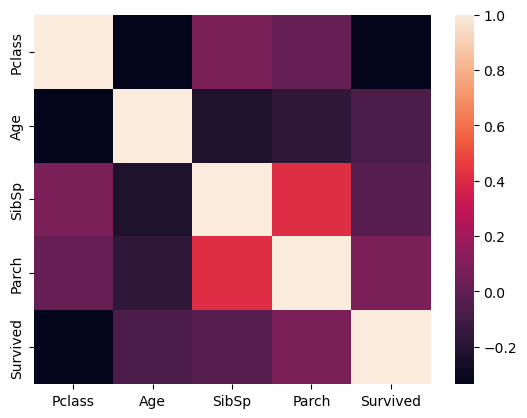

In [8]:
sns.heatmap(number_data.corr())
plt.show() #matplotlib과 seaborn이 최근 버전이면 제외해도 상관없음

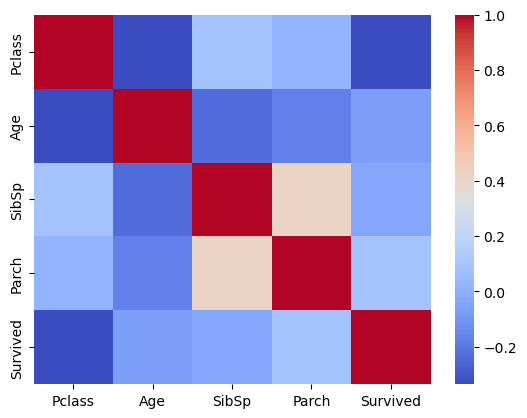

In [9]:
sns.heatmap(number_data.corr(), cmap='coolwarm')
plt.show()

<Axes: >

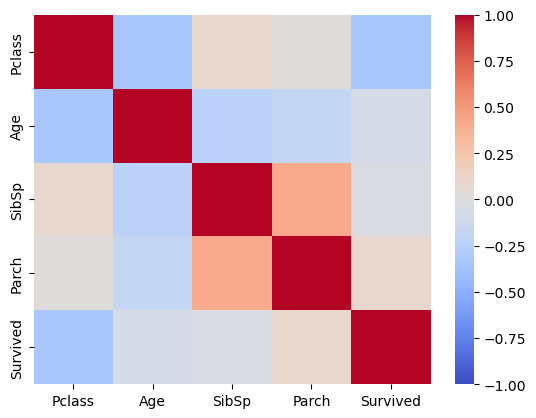

In [10]:
sns.heatmap(number_data.corr(), cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

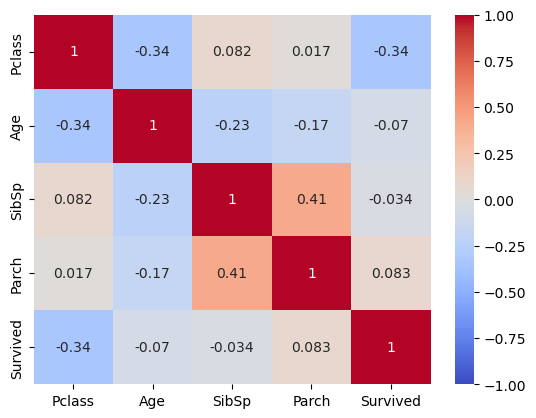

In [11]:
sns.heatmap(number_data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

## 5.4 전처리 : 카테고리 변수 변환하기(더미 변수와 원-핫 인코딩)


In [12]:
data['Name'].nunique()

889

In [13]:
data['Sex'].nunique()

2

In [14]:
data['Ticket'].nunique()

680

In [15]:
data['Embarked'].nunique()

3

In [16]:
data = data.drop(['Name','Ticket'], axis=1)  # 분류에 필요없는 데이터는 제외
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [17]:
# 원-핫-인코딩
pd.get_dummies(data, columns = ['Sex','Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [18]:
pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [19]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

In [20]:
data

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


## 5.5 모델링 및 예측하기

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1)  # 데이터셋에서 종속변수 제거하여 독립변수만 선택
y = data['Survived']  # 데이터셋에서 종속변수 선택
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)  # 학습셋, 테스트셋 분리

In [22]:
X

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,True,False,True
1,1,38.0,1,0,False,False,False
2,3,26.0,0,0,False,False,True
3,1,35.0,1,0,False,False,True
4,3,35.0,0,0,True,False,True
...,...,...,...,...,...,...,...
884,2,27.0,0,0,True,False,True
885,1,19.0,0,0,False,False,True
886,3,28.0,1,2,False,False,True
887,1,26.0,0,0,True,False,False


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# 모델 생성
model = LogisticRegression()
# 모델 학습
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
# 예측
pred = model.predict(X_test)

In [27]:
pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

## 5.6 예측 모델 평가하기

In [28]:
from sklearn.metrics import accuracy_score
# 정확도 계산
accuracy_score(y_test, pred)

0.7808988764044944

In [29]:
model.coef_

array([[-1.18186336, -0.03990394, -0.32076853,  0.00804733, -2.56835141,
        -0.07488912, -0.23731792]])

In [30]:
pd.Series(model.coef_, index = X.columns)

ValueError: Length of values (1) does not match length of index (7)

In [31]:
len(model.coef_)

1

In [32]:
len(model.coef_[0])

7

In [33]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.181863
Age          -0.039904
SibSp        -0.320769
Parch         0.008047
Sex_male     -2.568351
Embarked_Q   -0.074889
Embarked_S   -0.237318
dtype: float64

## 5.7 이해하기 : 피처 엔지니어링

In [34]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'], axis=1, inplace=True)

In [35]:
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [36]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742